<a href="https://colab.research.google.com/github/usshaa/A-complete-guide-to-DL/blob/master/Pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#!/bin/bash
!curl -L -o brain-mri-images-for-brain-tumor-detection.zip\
  https://www.kaggle.com/api/v1/datasets/download/navoneel/brain-mri-images-for-brain-tumor-detection

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.0M  100 15.0M    0     0  6087k      0  0:00:02  0:00:02 --:--:-- 11.7M


In [24]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from glob import glob
import cv2
from google.colab.patches import cv2_imshow

In [26]:
def read_images(data):
  lst_images = []
  for i in range(len(data)):
    img = cv2.imread(data[i])
    img = cv2.resize(img, (299, 299))
    lst_images.append(img)
  return lst_images

In [27]:
tf.keras.backend.clear_session()
data_yes_dir = "brain_tumor_dataset/yes"
data_no_dir  = "brain_tumor_dataset/no"

# Use glob to get a list of image file paths
import glob
data_yes_files = glob.glob(data_yes_dir + '/*.jpg') + glob.glob(data_yes_dir + '/*.JPG') + glob.glob(data_yes_dir + '/*.jpeg')
data_no_files  = glob.glob(data_no_dir + '/*.jpg') + glob.glob(data_no_dir + '/*.JPG') + glob.glob(data_no_dir + '/*.jpeg') + glob.glob(data_no_dir + '/*.png')

lst_imgs_yes  = read_images(data_yes_files)
lst_imgs_no   = read_images(data_no_files)

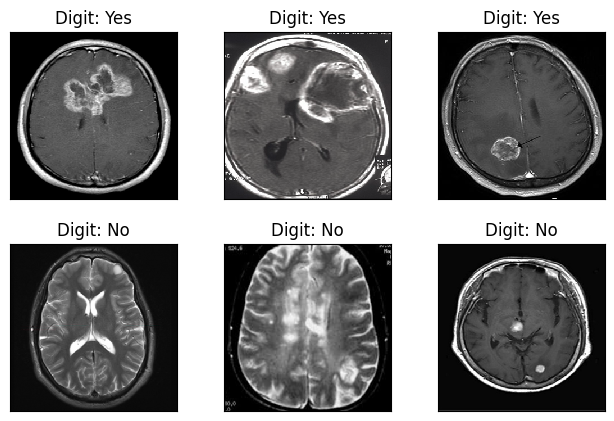

In [28]:
fig = plt.figure()
j = 0
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.tight_layout()
  if i < 3 :
    plt.imshow(lst_imgs_yes[i], cmap='gray', interpolation='none')
    plt.title("Digit: Yes")
  else:
    plt.imshow(lst_imgs_no[j], cmap='gray', interpolation='none')
    plt.title("Digit: No")
    j = j + 1
  plt.xticks([])
  plt.yticks([])

In [29]:
labels_yes = [1] * len(lst_imgs_yes)
labels_no  = [0] * len(lst_imgs_no)
Y = labels_yes + labels_no
X = lst_imgs_yes + lst_imgs_no

In [30]:
# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0
# (this also converts them to floats).
import numpy as np
Y = np.asarray(Y)
X = np.asarray(X)
X = X.astype("float32")
X = X / 255.0

In [31]:
# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                test_size= 0.20, random_state=100)

In [32]:
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)

X_train :  (201, 299, 299, 3)   X_test :  (51, 299, 299, 3)


In [33]:
# Creating the model using the Sequential API
"""
# CNN img(128, 128)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", input_shape= (128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Flatten())
layer0 = keras.layers.Dense(512, activation="relu",kernel_initializer="he_normal",
                                kernel_regularizer=keras.regularizers.l2(0.01))
layer1 = keras.layers.Dense(128, activation="relu",kernel_initializer="he_normal",
                                  kernel_regularizer=keras.regularizers.l2(0.01))
layer_output = keras.layers.Dense(1, activation="sigmoid",kernel_initializer="glorot_uniform")

model.add(layer0)
model.add(keras.layers.Dropout(0.2))
model.add(layer1)
model.add(keras.layers.Dropout(0.2))
model.add(layer_output)

# The model’s summary() method displays all the model’s layers
print(model.summary())
"""

'\n# CNN img(128, 128)\nmodel = keras.models.Sequential()\nmodel.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", input_shape= (128,128,3)))\nmodel.add(keras.layers.MaxPool2D(pool_size=2))\nmodel.add(keras.layers.Dropout(0.4))\nmodel.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))\nmodel.add(keras.layers.MaxPool2D(pool_size=2))\nmodel.add(keras.layers.Dropout(0.4))\nmodel.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))\nmodel.add(keras.layers.MaxPool2D(pool_size=2))\nmodel.add(keras.layers.Dropout(0.4))\n\nmodel.add(keras.layers.Flatten())\nlayer0 = keras.layers.Dense(512, activation="relu",kernel_initializer="he_normal",  \n                                kernel_regularizer=keras.regularizers.l2(0.01))\nlayer1 = keras.layers.Dense(128, activation="relu",kernel_initializer="he_normal",                                                      

In [34]:
# Xception img(299,299)
base_model = keras.applications.xception.Xception(weights="imagenet",include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(1, activation="sigmoid")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [35]:
"""
# InceptionV3 img(299,299)
base_model = keras.applications.inception_v3.InceptionV3(weights="imagenet",include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(1, activation="sigmoid")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)
"""

"""
# InceptionResNetV2 img(299,299)
base_model = keras.applications.inception_resnet_v2.InceptionResNetV2(weights="imagenet",include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(1, activation="sigmoid")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)
"""

"""
# VGG16 img(224,224)
base_model = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,
                         input_tensor=keras.layers.Input(shape=(224, 224,3)))

model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation="sigmoid"))
"""

'\n# VGG16 img(224,224)\nbase_model = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,\n                         input_tensor=keras.layers.Input(shape=(224, 224,3)))\n                 \nmodel = keras.models.Sequential()\nmodel.add(base_model)\nmodel.add(keras.layers.Flatten())\nmodel.add(keras.layers.Dense(1, activation="sigmoid"))\n'

In [36]:
# The model’s summary() method displays all the model’s layers
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, None,      │        864 │ input_layer[0][0] │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, None,      │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, None,      │          0 │ block1_conv1_bn[… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, None,      │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, None,      │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, None,      │          0 │ block1_conv2_bn[… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, None,      │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, None,      │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, None,      │          0 │ block2_sepconv1_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, None,      │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, None,      │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │      8,192 │ block1_conv2_act… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, None,      │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ block2_pool[0][0… │
│                     │ None, 128)        │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, None,      │          0 │ add[0][0]       

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 20,809,001 (79.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

None


In [37]:
# Freeze the weights of the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [38]:
# Compiling the model 0
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [39]:
# Training the model 0
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6010 - loss: 0.7146 - val_accuracy: 0.8049 - val_loss: 0.5051
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.6070 - loss: 0.9168 - val_accuracy: 0.6341 - val_loss: 1.2881
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.8499 - loss: 0.4506 - val_accuracy: 0.8293 - val_loss: 0.6009
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - accuracy: 0.8893 - loss: 0.4269 - val_accuracy: 0.7317 - val_loss: 0.7346
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.9268 - loss: 0.2264 - val_accuracy: 0.7561 - val_loss: 0.6846


In [40]:
# Unfreeze all the layers and continue training
for layer in base_model.layers:
    layer.trainable = True

In [41]:
# initialize the training data augmentation object
trainAug = keras.preprocessing.image.ImageDataGenerator( rotation_range=15, fill_mode="nearest")

In [42]:
EPOCHS = 200
BS = 32
# Compiling the model
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="binary_crossentropy", optimizer= opt, metrics=["accuracy"])

In [43]:
# Validation set
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train,
                                test_size= 0.20, random_state=100)

In [44]:
# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [45]:
# Interrupts training when it measures no progress on the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,  restore_best_weights=True)

In [47]:
# Training the model
history = model.fit( trainAug.flow(X_train, y_train, batch_size=BS), steps_per_epoch=len(X_train) // BS,
                        validation_data=(X_val, y_val), validation_steps=len(X_val) // BS, epochs=EPOCHS,
                        callbacks=[lr_scheduler, early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 112s 10s/step - accuracy: 0.8021 - loss: 0.6699 - val_accuracy: 0.7073 - val_loss: 1.7047 - learning_rate: 0.0010
Epoch 2/200
1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 922ms/step - accuracy: 0.8125 - loss: 0.3328

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8125 - loss: 0.3328 - val_accuracy: 0.6585 - val_loss: 2.2732 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9702 - loss: 0.1738 - val_accuracy: 0.9512 - val_loss: 0.1558 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7778 - loss: 1.9139 - val_accuracy: 1.0000 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 905ms/step - accuracy: 0.8883 - loss: 0.3441 - val_accuracy: 0.9024 - val_loss: 0.5664 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9375 - loss: 0.3694 - val_accuracy: 0.8293 - val_loss: 1.2334 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 978ms/step - accuracy: 0.9326 - loss: 0.2081 - val_accuracy: 0.6829 - val_loss: 8.1025 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7778 - loss: 0.4615 - val_accuracy: 0.6829 -

In [48]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt

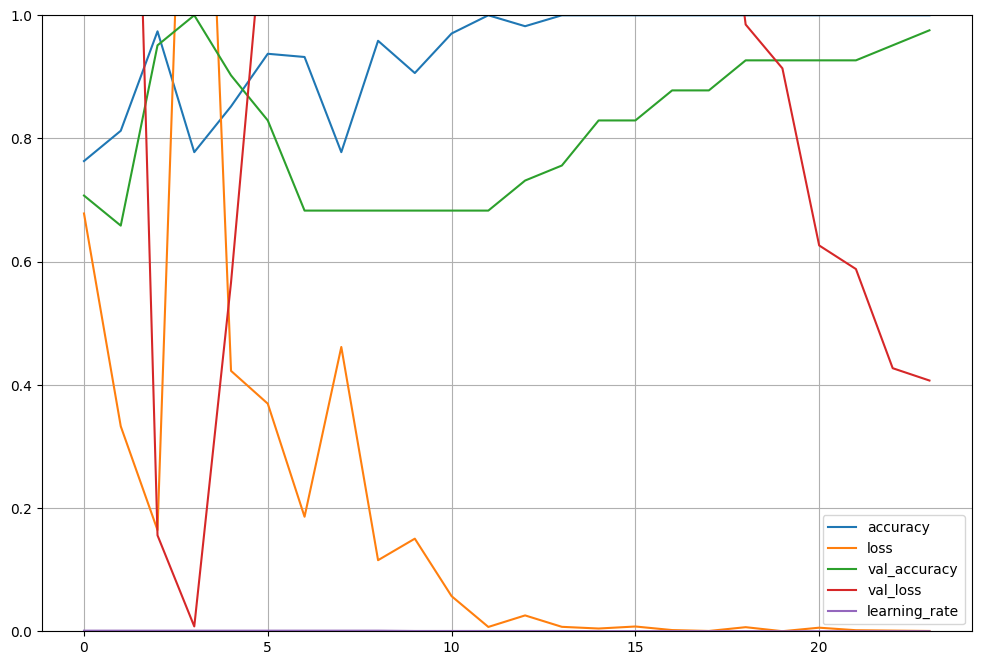

In [49]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [50]:
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 10s/step - accuracy: 0.9034 - loss: 0.7006
Loss     :  0.7053621411323547
accuracy :  0.9019607901573181


In [51]:
# Confusion Matrix
# y_pred = model.predict_classes(X_test)
y_pred = model.predict(X_test)
y_pred = np.around(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step


In [52]:
class_names = ["0", "1"]
# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.90      0.93      0.92        29

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51



In [53]:
# Function to draw confusion matrix
import seaborn as sns

In [54]:
def draw_confusion_matrix(true,preds):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds)
  print("Confusion matrix : \n")
  sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
  plt.show()
  return conf_matx

Confusion matrix : 



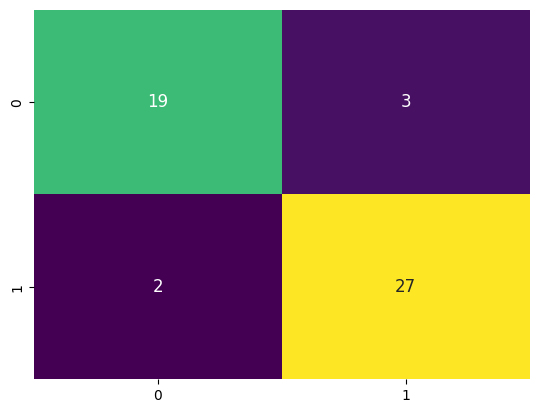

In [55]:
con_mat = draw_confusion_matrix(y_test, y_pred)

In [59]:
# Make predictions
predicted = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step


In [63]:
predicted = np.around(predicted)
predicted

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)